In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm



In [4]:
city_data_df = pd.read_csv("city_data.csv")
ride_data_df = pd.read_csv("ride_data.csv")
ride_data_df.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
city_data_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [195]:
# calc data...
#avg fare per city: y-axis
#Total Number of Rides Per City: x-axis
#Total Number of Drivers Per City: circle size
#City Type (Urban, Suburban, Rural): color of bubbles

In [6]:
#avg fare per city
new_ride_data = ride_data_df[['city','fare']]
new_ride_group=pd.DataFrame(new_ride_data.groupby(['city']).mean()['fare'])
new_ride_group.head()


,fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [7]:
#rides per city
city_rides = pd.DataFrame(ride_data_df.groupby(['city']).count()[('ride_id')])
city_rides.head(20)

,ride_id
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19
Arnoldview,31
Campbellport,15
Carrollbury,10
Carrollfort,29


In [8]:
#driver count
driver_count = city_data_df.groupby(['city']).sum()[('driver_count')]
driver_count.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [9]:
#city type
city_data_df=city_data_df.sort_values(by=['city'], ascending=True)
city_type_df = city_data_df[['city', 'type']].set_index('city')
#assign colors to ciy-types
city_type_df=city_type_df[['type']].replace({'Urban': '#75bbfd', 'Suburban': '#dbb40c', 'Rural': '#f08080' })
city_type_df.groupby('city')
city_type_df.head()


,type
city,
Alvarezhaven,#75bbfd
Alyssaberg,#75bbfd
Anitamouth,#dbb40c
Antoniomouth,#75bbfd
Aprilchester,#75bbfd


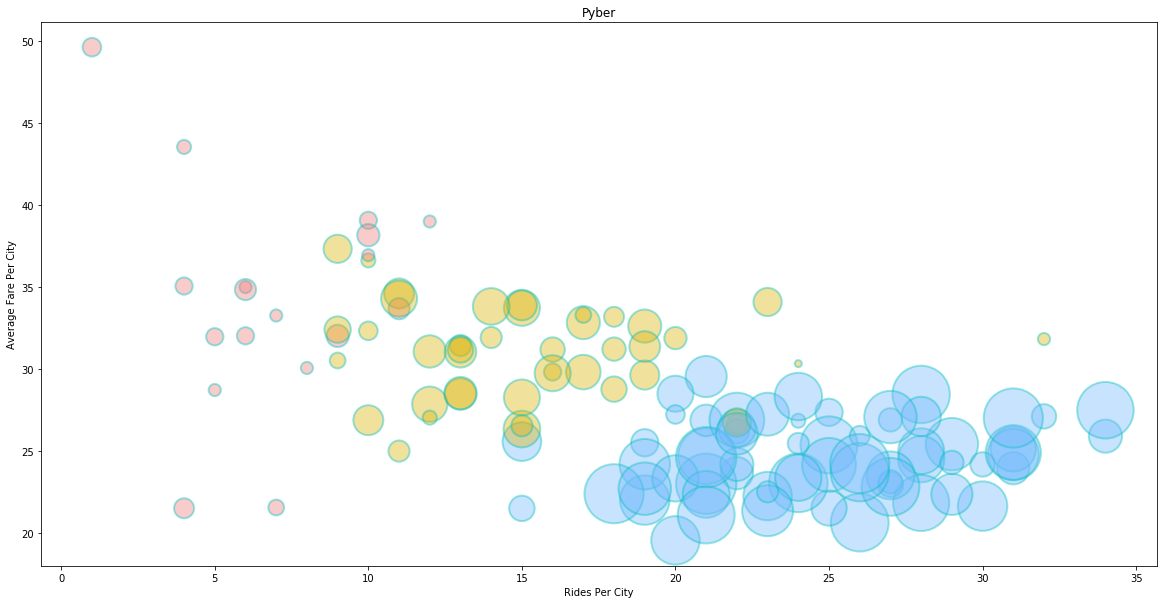

In [10]:
# making the scatter plot

plt.figure(figsize=(20,10))
plt.scatter(city_rides['ride_id'], new_ride_group['fare'], s=driver_count*50, c=city_type_df['type'], linewidths=2, edgecolor='c', alpha=0.4)
plt.title("Pyber")
plt.xlabel("Rides Per City")
plt.ylabel("Average Fare Per City")
#legend

plt.show()

In [ ]:
#calc data for pie charts

In [11]:
merged_table = pd.merge(ride_data_df, city_data_df, on="city", how="left")
merged_table


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346,58,Urban
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335,22,Urban
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082,52,Urban
8,Travisville,2016-01-15 17:32:02,27.39,850152768361,37,Urban
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524,11,Urban


In [12]:
total_fares = merged_table['fare'].sum()
merged_table_fares_df = merged_table.groupby(['type']).sum()['fare']/total_fares*100
merged_table_fares_df.head()


type
Rural        6.68500
Suburban    30.34954
Urban       62.96546
Name: fare, dtype: float64

In [13]:
total_rides = merged_table['ride_id'].count()
merged_table_rides_df = merged_table.groupby(['type']).count()['ride_id']/total_rides*100
merged_table_rides_df.head()

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [14]:
total_drivers= merged_table['driver_count'].sum()
merged_table_drivers_df = merged_table.groupby(['type']).sum()['driver_count']/total_drivers*100
merged_table_drivers_df.head()

type
Rural        0.976127
Suburban    12.419775
Urban       86.604098
Name: driver_count, dtype: float64

merged_table = merged_table.groupby(['type']).sum()[('fare')])

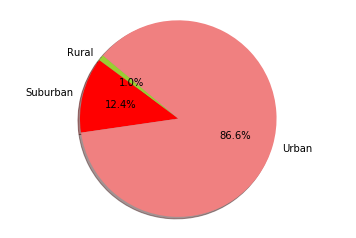

In [15]:
#Pie charts
#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type


# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]


# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]

plt.title=('% of Total Drivers by City Type')
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(merged_table_drivers_df, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()

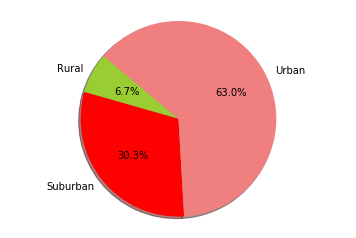

In [16]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]


# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]

plt.title=('% of Total Fares by City Type')
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(merged_table_fares_df, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()

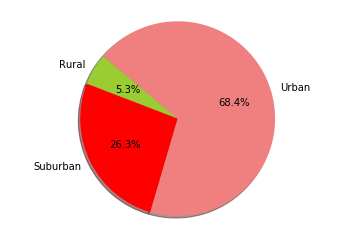

In [17]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]


# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]

plt.title=('% of Total Rides by City Type')
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(merged_table_rides_df, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()

In [ ]:
#observations: seems like the suburbs are a good place to be, with fewer drivers, but garnering 
#a good % of the total fares and rides; you can see from the bubble chart too, that there are
#alot of rides given in the Urban cities, with alot of drivers, but the average fares are low;
#rural cities have some of the highest average fares, but not alot of rides overall; suburbs are
# in a good middle ground, with higher average fares, and a decent amount of rides. 